In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pytorch
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from modulos.rede import ModeloNeural
from modulos.datasets import Bicicletas


In [2]:
args = dict(
    batch_size = 50
)

In [3]:
dados = pd.read_csv('../dados/hour.csv')
dados.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dados.drop(['dteday', 'instant'], axis = 1, inplace = True)

In [5]:
dados.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
x_train, x_test = train_test_split(dados)

In [7]:
train_set = Bicicletas(x_train)
test_set = Bicicletas(x_test)

In [8]:
train_loader = DataLoader(
    train_set,
    batch_size = args['batch_size'],
    shuffle=True
)

test_loader = DataLoader(
    test_set,
    batch_size = args['batch_size'],
    shuffle=False
)

In [9]:
for i in test_loader:
    dado, label = i
    print(dado.size())
    print(label.size())
    break

torch.Size([50, 14])
torch.Size([50, 1])


In [10]:
net = ModeloNeural(14, 128, 1).to()

In [39]:
loss = net.fit(200, train_loader, test_loader, 5e-5, 5e-4)

Época 1 - loss  36.40 +/- 33.61 - Tempo  0.79 - val_loss  38.42 - Tempo  0.10
Época 2 - loss  134.25 +/- 63.46 - Tempo  0.84 - val_loss  185.49 - Tempo  0.10
Época 3 - loss  109.01 +/- 61.47 - Tempo  0.79 - val_loss  26.66 - Tempo  0.10
Época 4 - loss  69.89 +/- 49.45 - Tempo  0.70 - val_loss  166.40 - Tempo  0.10
Época 5 - loss  152.54 +/- 60.64 - Tempo  0.66 - val_loss  71.09 - Tempo  0.12
Época 6 - loss  54.43 +/- 33.58 - Tempo  0.68 - val_loss  120.86 - Tempo  0.10
Época 7 - loss  163.77 +/- 48.91 - Tempo  0.76 - val_loss  108.59 - Tempo  0.13
Época 8 - loss  42.16 +/- 29.50 - Tempo  0.83 - val_loss  68.47 - Tempo  0.10
Época 9 - loss  145.66 +/- 51.61 - Tempo  0.92 - val_loss  136.13 - Tempo  0.13
Época 10 - loss  44.77 +/- 42.00 - Tempo  0.97 - val_loss  36.74 - Tempo  0.14
Época 11 - loss  136.58 +/- 56.51 - Tempo  0.86 - val_loss  173.19 - Tempo  0.11
Época 12 - loss  73.47 +/- 58.95 - Tempo  0.81 - val_loss  21.47 - Tempo  0.14
Época 13 - loss  129.35 +/- 80.35 - Tempo  0.94 -

In [40]:
dados = pd.DataFrame(loss).T
dados.rename({ 0 : 'Treino', 1: 'Validacao'}, axis =1, inplace=True)
dados.reset_index(inplace=True)

<AxesSubplot:xlabel='index', ylabel='Treino'>

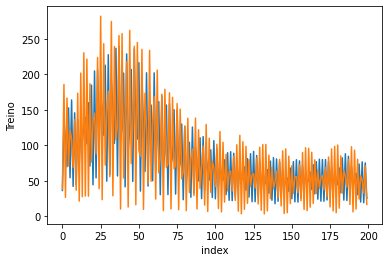

In [41]:
sns.lineplot(data = dados, x = 'index', y= 'Treino')
sns.lineplot(data = dados, x = 'index', y= 'Validacao')

In [43]:
net

ModeloNeural(
  (features): Sequential(
    (0): Linear(in_features=14, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (regressor): Sequential(
    (0): Linear(in_features=128, out_features=1, bias=True)
    (1): ReLU()
  )
  (loss): MSELoss()
)

In [45]:
torch.save(net, '../modelos/modelo_bicicletas.h5')